In [2]:
using Winston;

In [3]:
using Color;

In [4]:
include("sampledata.jl")

sampledata

In [5]:
import sampledata

In [7]:
nsample=1024

1024

In [27]:
x,y,iw,ynorm=sampledata.genfm(nsample,1.0,0.033,1.0,100pi)

(linspace(0.0,314.1592653589793,1024),[1.0,0.950103,0.805392,0.580311,0.297322,-0.0153325,-0.326452,-0.604992,-0.823162,-0.959197  …  -0.930731,-0.997268,-0.974436,-0.864213,-0.676421,-0.427857,-0.140798,0.158988,0.444559,0.69021],[1.033,1.033,1.03299,1.03298,1.03297,1.03296,1.03294,1.03292,1.03289,1.03286  …  0.978252,0.978505,0.97876,0.979017,0.979276,0.979537,0.979801,0.980066,0.980334,0.980603],0.01)

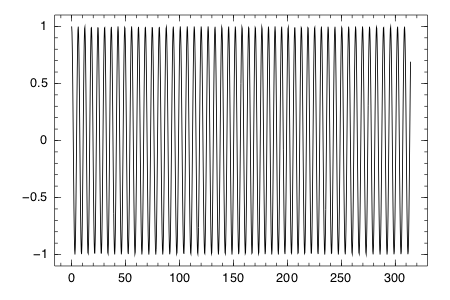

In [28]:
display(plot(x,y))

In [10]:
import DSP

In [29]:
z=DSP.Util.hilbert(y);

In [30]:
include("jnufft.jl");

In [31]:
include("cohenclass.jl");

In [88]:
include("polywv.jl");

In [54]:
tfrwv=cohenclass.tfrwv(z);

Single Wigner Ville
Use fft.


In [55]:
tfrp=polywv.tfrpowv(z);

DON'T USE !!! DO NOT WORKING YET.
Single polynomial Wigner Ville (6-th order)
Use fft.


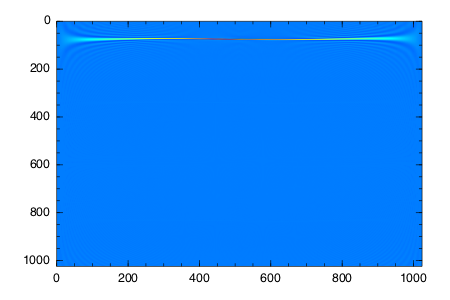

In [56]:
imagesc(real(tfrp)[:,:])

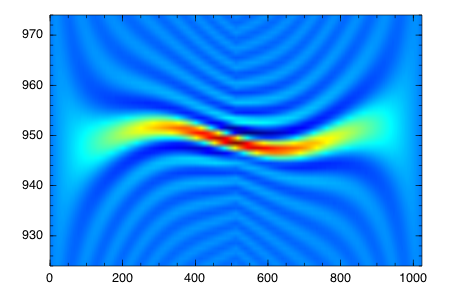

In [57]:
ylim(1024-100,1024-50)

In [58]:
fin=collect(linspace(50,100,1024));

In [59]:
tfrph=polywv.tfrpowv(z,NaN,NaN,fin,NaN,0);

DON'T USE !!! DO NOT WORKING YET.
Single polynomial Wigner Ville (6-th order)
Use nufft.


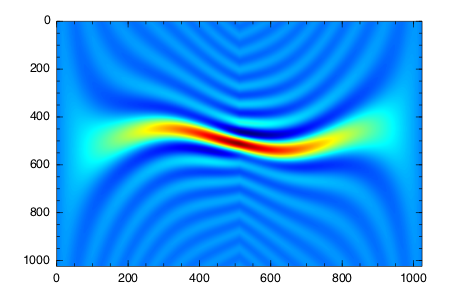

In [60]:
imagesc(real(tfrph)[:,:])

In [50]:
include("extif.jl");

In [75]:
indfwv=extif.maxif(real(tfrwv));

In [76]:
indfp=extif.maxif(real(tfrp));

In [77]:
indfph=extif.maxif(real(tfrph));

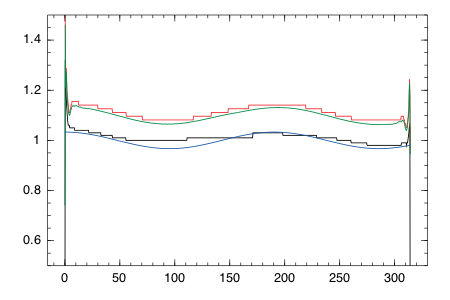

In [85]:
ylim(0.5,1.5)

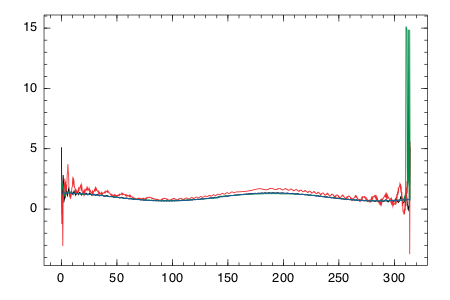

In [524]:
display(plot(x,indfwv*ynorm,x,indfp*ynorm/0.675,x,indf*ynorm/0.675,x,iw))

In [90]:
include("estif.jl");

In [93]:
dx=x[2]-x[1];

In [102]:
indfnphi,tfrphi =estif.ifestxpowv(z,ynorm,dx,10,fin[round(Int,indfph)],NaN,NaN,fin,true);

DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.


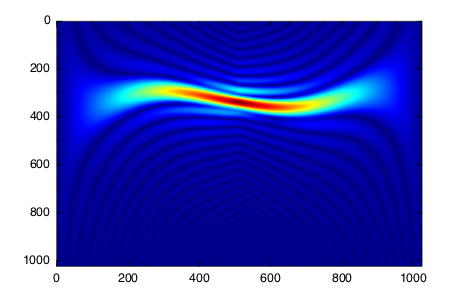

In [103]:
imagesc(abs(tfrphi)[:,:])

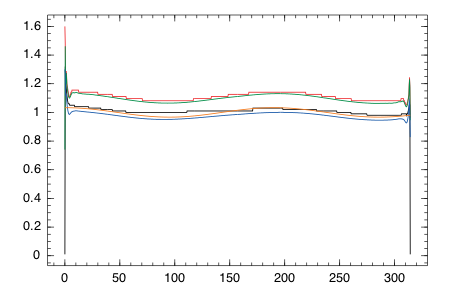

In [107]:
display(plot(x,indfwv*ynorm,x,indfp*ynorm/0.675,x,fin[round(Int,indfph)]*ynorm/0.675,x,indfnphi*ynorm/0.675,x,iw))

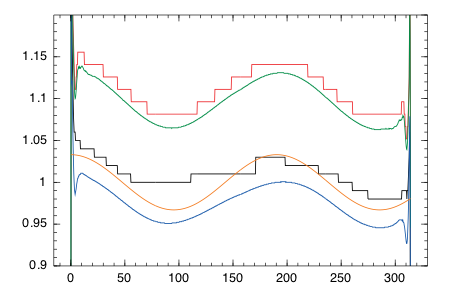

In [109]:
ylim(0.9,1.2)

## with Guassian noise

In [110]:
using Distributions

In [111]:
d = Normal()

Distributions.Normal(μ=0.0, σ=1.0)

In [153]:
sn=1.0;

In [154]:
ynoise=y+rand(d,nsample)*std(y)*sn;

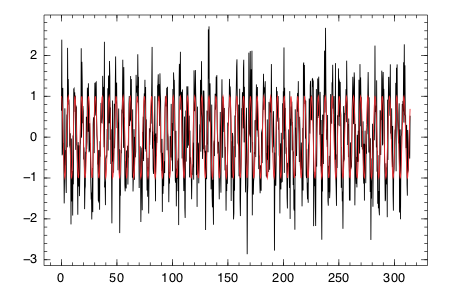

In [155]:
display(plot(x,ynoise,x,y))

In [156]:
zn=DSP.Util.hilbert(ynoise);

#### WV w/o nufft

In [157]:
tfrn=cohenclass.tfrwv(zn);

Single Wigner Ville
Use fft.


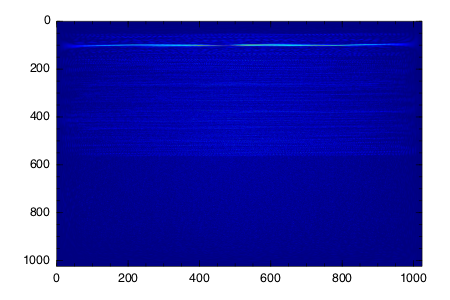

In [158]:
imagesc(abs(tfrn))

In [174]:
fin=collect(linspace(75,125,1024));

#### WV with nufft

In [160]:
tfrxwvnh=cohenclass.tfrwv(zn,NaN,NaN,fin,NaN,0);

Single Wigner Ville
Use nufft.


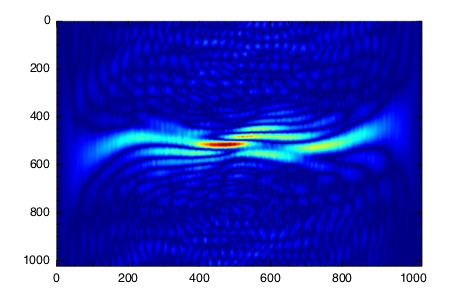

In [162]:
imagesc(abs(tfrxwvnh))

In [163]:
indfns=extif.maxif(abs(tfrxwvnh));

In [164]:
include("estif.jl")

estif

In [165]:
import estif

In [166]:
dx=x[2]-x[1]

0.3070960560693835

#### XWV with nufft 

In [167]:
indfnsc,tfrni=estif.ifestxvwd(zn,ynorm,dx,7,fin[round(Int,indfns)],NaN,NaN,fin,true);

Cross Wigner Ville
Use nufft.
Cross Wigner Ville
Use nufft.
Cross Wigner Ville
Use nufft.
Cross Wigner Ville
Use nufft.
Cross Wigner Ville
Use nufft.
Cross Wigner Ville
Use nufft.
Cross Wigner Ville


Use nufft.


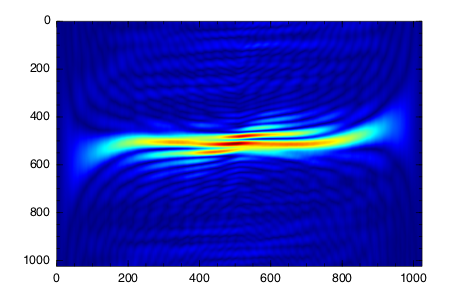

In [168]:
imagesc(abs(tfrni))

#### polynomial WV with nufft

In [172]:
finx=collect(linspace(50,100,1024));

In [173]:
tfrxph=polywv.tfrpowv(zn,NaN,NaN,finx,NaN,0);

DON'T USE !!! DO NOT WORKING YET.
Single polynomial Wigner Ville (6-th order)
Use nufft.


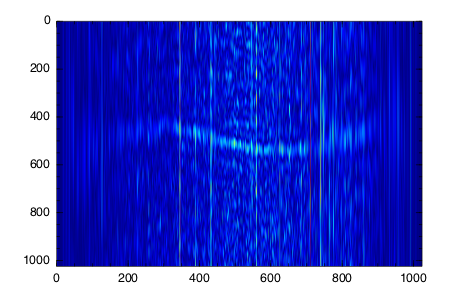

In [171]:
imagesc(abs(tfrxph))

#### Cross PWV with nufft

In [175]:
indfxph=extif.maxif(abs(tfrxph));

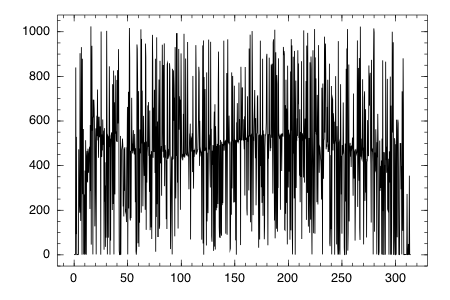

In [180]:
plot(x,indfxph)

In [176]:
indfnxpoly, tfrnxpi=estif.ifestxpowv(zn,ynorm,dx,4,finx[round(Int,indfxph)],NaN,NaN,finx,true);

DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.
DON'T USE !!! DO NOT WORKING YET.
Cross polynomial Wigner Ville (6-th order)
Use nufft.


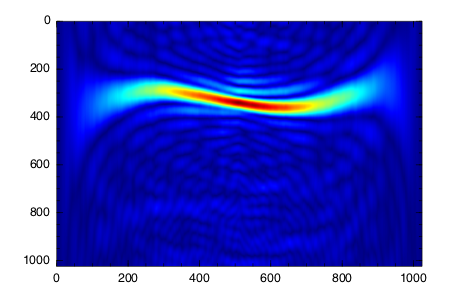

In [177]:
imagesc(abs(tfrnxpi))

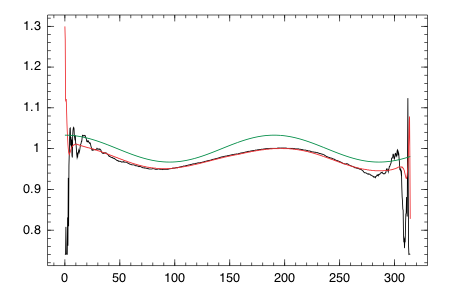

In [196]:
plot(x,indfnxpoly*ynorm/0.675,x,indfnphi*ynorm/0.675,x,iw)

In [ ]:
#### comments: black-XPWV with noise, red-XPWV with no noise, green-input. 

In [ ]:
### indfnpoly provides "the argmax value" as the IF estimate (XPWV case I)

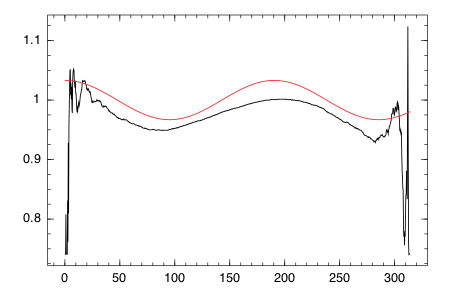

In [183]:
plot(x,ynorm*indfnxpoly/0.675,x,iw)

#### Short Time Fourier Transform

In [184]:
include("stft.jl");

In [185]:
tfrstft=stft.tfrstft(ynoise);

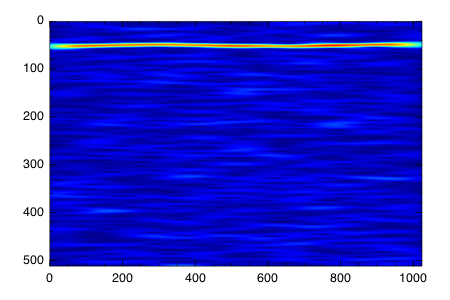

In [191]:
imagesc((abs(tfrstft))[1:round(Int,nsample/2),:])

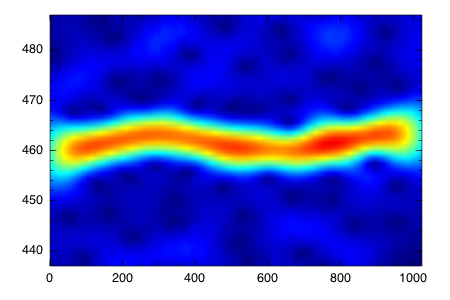

In [193]:
ylim(512-75,512-25)

In [187]:
indfs1=extif.aveif(real(tfrstft),1,round(Int,nsample/2));

In [188]:
indfs2=extif.maxif(real(tfrstft)[1:round(Int,nsample/2),:]);

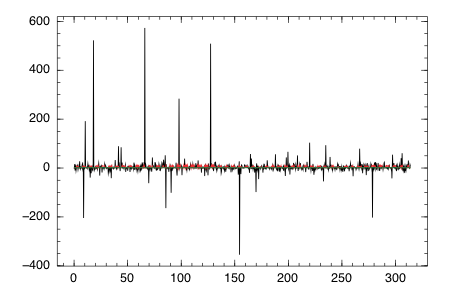

In [189]:
display(plot(x,indfs1/50,x,indfs2/50,x,iw))

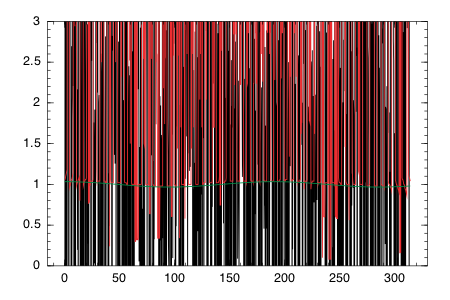

In [190]:
ylim(0,3)